In [11]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from analyze.get_score_df import get_all_score_df

# path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/43/three/rc_4-np_6'
path2target = '/home/y1u0d2/result/n2p2/Si/103/dimer_10x_sf_long'
# path2target = '/home/y1u0d2/result/n2p2/Si/100/06'

if os.path.exists(f'{path2target}/score.csv'):
    score_df = pd.read_csv(f'{path2target}/score.csv')
else:
    score_df = get_all_score_df(path2target)

score_df.to_csv(f'{path2target}/score.csv', index=False)

epoch: 0 out of 201
epoch: 1 out of 201
epoch: 2 out of 201
epoch: 3 out of 201
epoch: 4 out of 201
epoch: 5 out of 201
epoch: 6 out of 201
epoch: 7 out of 201
epoch: 8 out of 201
epoch: 9 out of 201
epoch: 10 out of 201
epoch: 11 out of 201
epoch: 12 out of 201
epoch: 13 out of 201
epoch: 14 out of 201
epoch: 15 out of 201
epoch: 16 out of 201
epoch: 17 out of 201
epoch: 18 out of 201
epoch: 19 out of 201
epoch: 20 out of 201
epoch: 21 out of 201
epoch: 22 out of 201
epoch: 23 out of 201
epoch: 24 out of 201
epoch: 25 out of 201
epoch: 26 out of 201
epoch: 27 out of 201
epoch: 28 out of 201
epoch: 29 out of 201
epoch: 30 out of 201
epoch: 31 out of 201
epoch: 32 out of 201
epoch: 33 out of 201
epoch: 34 out of 201
epoch: 35 out of 201
epoch: 36 out of 201
epoch: 37 out of 201
epoch: 38 out of 201
epoch: 39 out of 201
epoch: 40 out of 201
epoch: 41 out of 201
epoch: 42 out of 201
epoch: 43 out of 201
epoch: 44 out of 201
epoch: 45 out of 201
epoch: 46 out of 201
epoch: 47 out of 201
ep

In [12]:
score_df.to_csv(f'{path2target}/score.csv', index=False)

In [13]:
score_df

,R2,RMSE,MAE,epoch,data_type,type
0,-111.550492,10.874386,1.729768,0,test,force
1,-107.732850,10.360069,1.643130,0,train,force
2,-117.156692,11.086137,6.138039,0,test,energy
3,-127.390367,11.272793,6.179663,0,train,energy
4,0.998140,0.044212,0.020688,1,test,force
...,...,...,...,...,...,...
799,0.998262,0.041481,0.009738,199,train,energy
800,0.999177,0.029404,0.019186,200,test,force
801,0.999151,0.028957,0.018965,200,train,force
802,0.998362,0.041272,0.009717,200,test,energy


In [14]:
def plot_score(df, score, ax):
    # plot log scale
    ax.set_yscale('log')
    sns.lineplot(data=df, x='epoch', y=score, hue='data_type', ax=ax)

/home/y1u0d2/anaconda3/envs/research/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


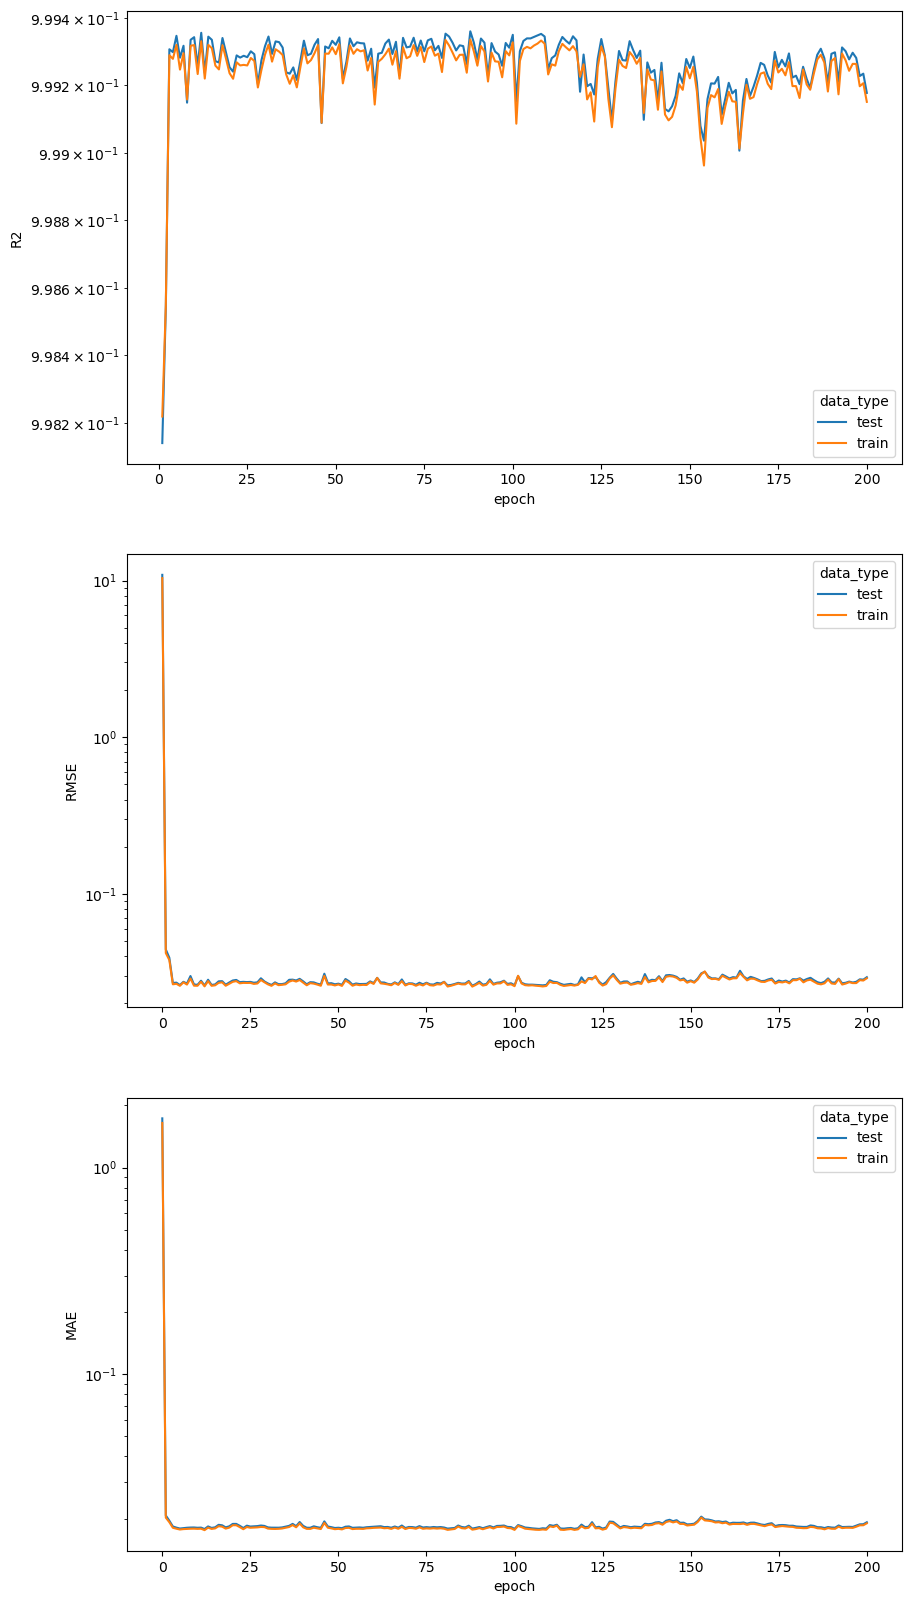

In [15]:
force_df = score_df.loc[score_df['type'] == 'force']

fig = plt.figure(figsize=(10,20))
axes = fig.subplots(3, 1)

# axes[0].set_ylim(-1, 1.1)
plot_score(force_df, 'R2', axes[0])
plot_score(force_df, 'RMSE', axes[1])
plot_score(force_df, 'MAE', axes[2])

/home/y1u0d2/anaconda3/envs/research/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


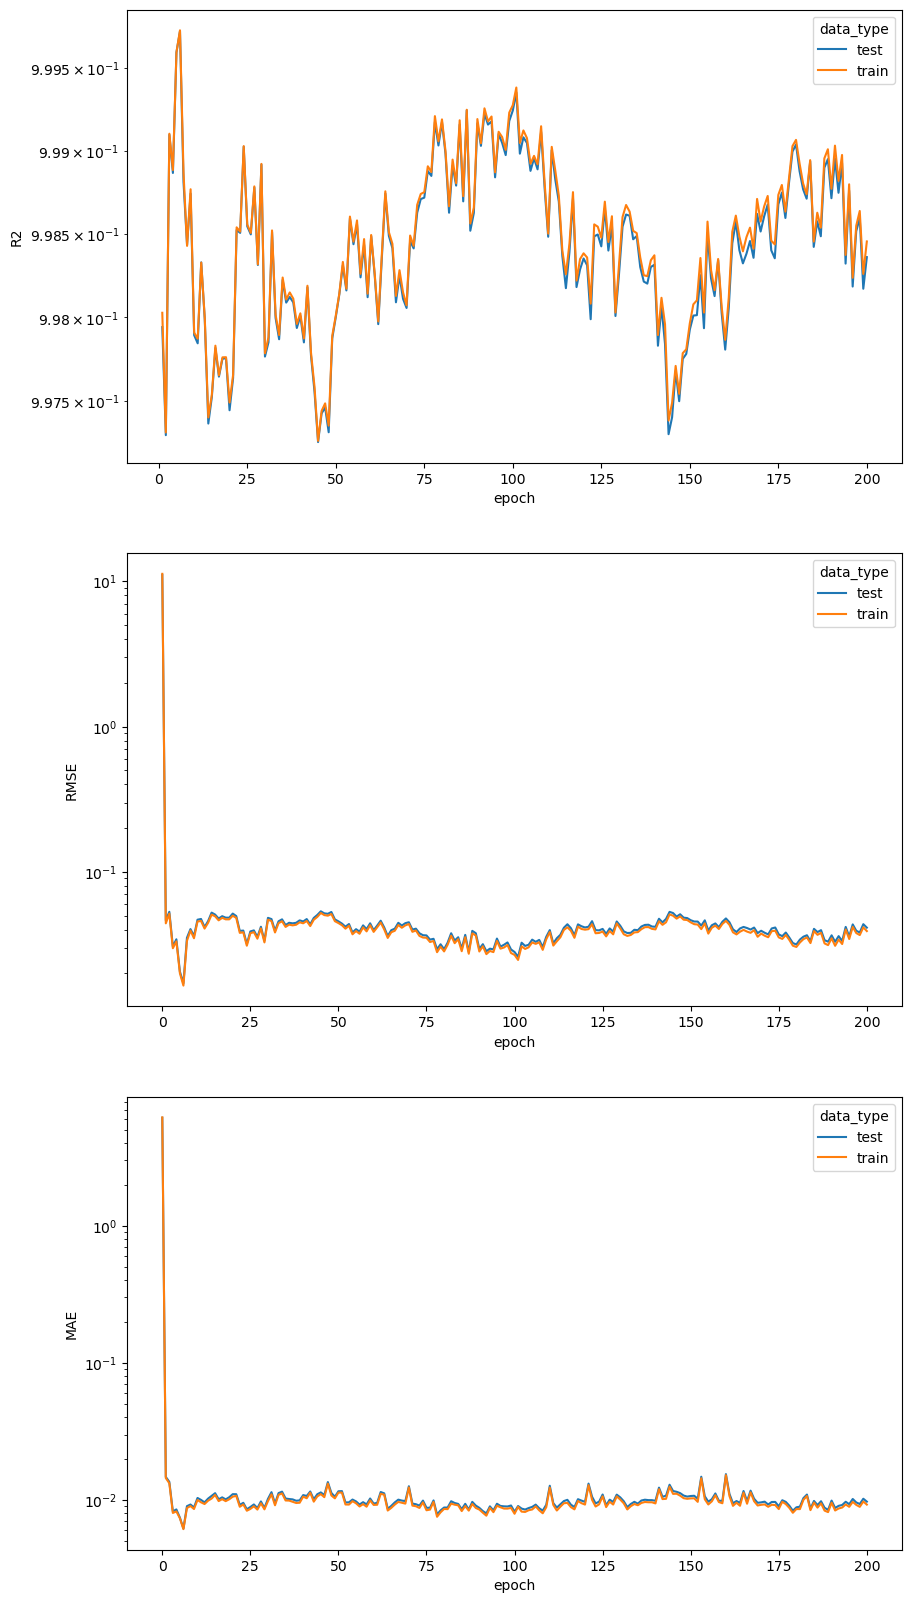

In [16]:
energy_df = score_df.loc[score_df['type'] == 'energy']

fig = plt.figure(figsize=(10,20))
axes = fig.subplots(3, 1)

plot_score(energy_df, 'R2', axes[0])
plot_score(energy_df, 'RMSE', axes[1])
plot_score(energy_df, 'MAE', axes[2])

In [17]:
import numpy as np
tmp_df = score_df.loc[(score_df['data_type']=='test') & (score_df['type']=='force')]
epoch = np.argmin(tmp_df['MAE'].values)

In [18]:
# score_df.query('epoch == 20')
score_df.query('epoch == @epoch')

,R2,RMSE,MAE,epoch,data_type,type
48,0.999355,0.026027,0.017789,12,test,force
49,0.999330,0.025712,0.017572,12,train,force
50,0.998331,0.041669,0.009600,12,test,energy
51,0.998329,0.040663,0.009334,12,train,energy


In [19]:
score_df.query('epoch > 120 and data_type=="test" and type=="force"')

,R2,RMSE,MAE,epoch,data_type,type
484,0.999197,0.029049,0.018238,121,test,force
488,0.999204,0.028925,0.019203,122,test,force
492,0.999172,0.029488,0.018126,123,test,force
496,0.999278,0.027534,0.018240,124,test,force
500,0.999337,0.026395,0.017880,125,test,force
...,...,...,...,...,...,...
784,0.999296,0.027194,0.018208,196,test,force
788,0.999281,0.027488,0.018488,197,test,force
792,0.999227,0.028496,0.018748,198,test,force
796,0.999234,0.028367,0.018766,199,test,force


In [20]:
score_df.query('epoch == 185')

,R2,RMSE,MAE,epoch,data_type,type
740,0.999246,0.028153,0.018420,185,test,force
741,0.999233,0.027514,0.018155,185,train,force
742,0.998424,0.040489,0.009831,185,test,energy
743,0.998456,0.039094,0.009571,185,train,energy
